# Mercado Livre Web Scraper

O objetivo desse projeto é a fazer a raspagem de dados do site mercadolivre.com.br e partir disso criar análises. Raspagem feita dia 01/08/2022

In [38]:
#bibliotecas necessárias

from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def trata_html(input):
    return " ".join(input.split()).replace('> <', '><')

In [28]:
cards = []

#conexão com a url da pesquisa
#busca 'Iphone' realizada no site https://mercadolivre.com.br

for i in range(1,1952,50):
    response = urlopen('https://lista.mercadolivre.com.br/celulares-telefones/celulares-smartphones/iphone_Desde_'+str(i)+'_NoIndex_True')
    html = response.read().decode('utf-8')
    html = trata_html(html)
    soup = BeautifulSoup(html, 'html.parser')

    card = {}
    
    #scraping dos aparelhos
    aparelhos = []
    for item in soup.findAll('h2', class_="ui-search-item__title"):
        aparelhos.append(item.text)

    #scraping dos links
    links = []
    for link in soup.findAll('a', class_="ui-search-item__group__element ui-search-link", href=True):
        links.append(link['href'])

    #scraping dos preços
    precos = []
    for item in soup.findAll('span', class_="price-tag ui-search-price__part"):
        precos.append(item.text)

    #tratamento dos preços

    precos = precos[0:120:2]
    precos = [i.split(' ')[0] for i in precos]
    
    estado = []
    for item in soup.findAll('div', class_="ui-search-result__content-column ui-search-result__content-column--left"):
        if 'Usado' in item.text:
            estado.append('Usado')
        elif 'Recondicionado' in item.text:
            estado.append('Usado')        
        else:
            estado.append('Novo')
    
    #armazenamento das informações dos produtos
    
    card['Aparelhos'] = aparelhos
    card['Precos R$'] = precos
    card['Estado'] = estado
    card['Links'] = links

    cards.append(card)

In [35]:
#leitura do dataframe

dataset = pd.DataFrame(cards)
dataset.tail()

,Aparelhos,Precos R$,Estado,Links
35,"[Apple iPhone 13 (512gb) - Estelar, iPhone XS ...","[8563, 3329, 3099, 2960, 2340, 5303, 6300, 823...","[Novo, Usado, Novo, Usado, Usado, Novo, Novo, ...",[https://produto.mercadolivre.com.br/MLB-26264...
36,[Apple iPhone 13 Pro Max 128gb Verde - Lançame...,"[8299, 699, 75, 3391, 220, 6949, 3999, 622, 17...","[Novo, Usado, Usado, Usado, Usado, Novo, Usado...",[https://produto.mercadolivre.com.br/MLB-27021...
37,[Celular Apple iPhone 7 Plus 32gb Gold Dourado...,"[1884, 1800, 2110, 3261, 1099, 1099, 650, 2520...","[Usado, Usado, Novo, Novo, Usado, Usado, Usado...",[https://produto.mercadolivre.com.br/MLB-18460...
38,[iPhone XR 128gb Branco Muito Bom - Trocafone ...,"[2899, 1089, 3499, 700, 2749, 1999, 7580, 3999...","[Usado, Usado, Usado, Usado, Novo, Novo, Usado...",[https://produto.mercadolivre.com.br/MLB-21654...
39,[iPhone XR 128gb Branco Bateria 100% + Carrega...,"[2699, 1299, 1858, 8499, 819, 2249, 1858, 80, ...","[Novo, Usado, Novo, Novo, Usado, Usado, Novo, ...",[https://produto.mercadolivre.com.br/MLB-26925...


In [36]:
#transposição das listas dos produtos em linhas

dataset = dataset.apply(pd.Series.explode).reset_index()

In [38]:
#conversão da coluna 'preços' em float64

dataset.drop(['index'], axis=1, inplace=True)
dataset['Precos R$'] = dataset['Precos R$'].astype(np.float64)

In [40]:
dataset.head()

,Aparelhos,Precos R$,Estado,Links
0,Apple iPhone 12 (64 GB) - Verde,4199.0,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
1,iPhone 7 128 GB dourado,1271.0,Novo,https://www.mercadolivre.com.br/iphone-7-128-g...
2,iPhone 8 Plus 64 GB cinza-espacial,1840.0,Novo,https://www.mercadolivre.com.br/iphone-8-plus-...
3,Apple iPhone 11 (128 GB) - Preto,3699.0,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
4,Apple iPhone 11 (64 GB) - Preto,3199.0,Novo,https://www.mercadolivre.com.br/apple-iphone-1...


In [41]:
#armazenamento do dataset em um arquivo xlsx
dataset.to_excel('WebScrapingMercadoLivreIphone.xlsx', index=False)

In [2]:
#leitura do dataset
Iphones = pd.read_excel('WebScrapingMercadoLivreIphone.xlsx')
Iphones.tail()

,Aparelhos,Precos R$,Estado,Links
1994,Usado: iPhone 8 64gb Prateado Bom - Trocafone,1559,Usado,https://produto.mercadolivre.com.br/MLB-209493...
1995,iPhone 7 32gb,800,Usado,https://produto.mercadolivre.com.br/MLB-212855...
1996,iPhone 11 64gb Preto Novo,3739,Novo,https://produto.mercadolivre.com.br/MLB-262198...
1997,Apple iPhone 8 Plus (64 Gb) - Original Vitrine...,2449,Novo,https://produto.mercadolivre.com.br/MLB-262279...
1998,iPhone 6s Plus 32 Gb Cor Prata/original/novo C...,1858,Novo,https://produto.mercadolivre.com.br/MLB-268492...


In [188]:
#produto mais caro
Iphones['Precos R$'].astype(float)
Iphones['Precos R$'].max()
Iphones.loc[Iphones['Precos R$'] == 30305]

,Aparelhos,Precos R$,Estado,Links
1335,50 Unidades - iPhone SE Mp822br/a 4 32gb - Cin...,30305,Usado,https://produto.mercadolivre.com.br/MLB-263210...


In [190]:
#produto mais barato
Iphones['Precos R$'].min()
Iphones.loc[Iphones['Precos R$'] == 20]

,Aparelhos,Precos R$,Estado,Links
988,Teclado Bluetooth Para iPhone E Android,20,Novo,https://produto.mercadolivre.com.br/MLB-163072...


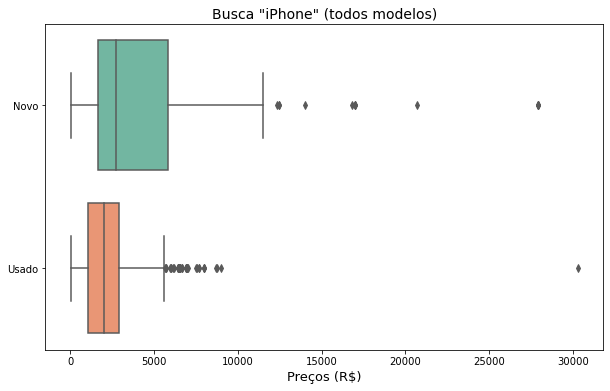

In [193]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphones, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('Busca "iPhone" (todos modelos)', fontsize=14)
plt.show()

## iPhone 13

In [6]:
Iphone_13 = Iphones[ Iphones['Aparelhos'].str.contains(" 13 ", case=False) ]
Iphone_13

,Aparelhos,Precos R$,Estado,Links
6,Apple iPhone 13 (128 GB) - Meia-noite,5400,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
17,Apple iPhone 13 Pro (256 GB) - Azul-Sierra,7929,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
22,Apple iPhone 13 Pro Max (256 GB) - Azul-Sierra,8531,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
24,Apple iPhone 13 Pro Max (128 GB) - Azul-Sierra,8215,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
28,Apple iPhone 13 (256 GB) - Meia-noite,6479,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
...,...,...,...,...
1952,Apple iPhone 13 Pro (256 Gb) - Grafite Novo La...,8499,Novo,https://produto.mercadolivre.com.br/MLB-261858...
1967,iPhone 13 Pro 128 Gb,7000,Usado,https://produto.mercadolivre.com.br/MLB-215740...
1969,iPhone 13 128gb Estado De Novo Parcelado Em At...,6490,Usado,https://produto.mercadolivre.com.br/MLB-269369...
1970,Apple iPhone 13 Mini (128gb) - Meia-noite,6317,Novo,https://produto.mercadolivre.com.br/MLB-264410...


#### iPhone 13 1 TB

In [160]:
Iphone_13_1TB = Iphone_13[ Iphone_13['Aparelhos'].str.contains("1tb", case=False) | 
                          Iphone_13['Aparelhos'].str.contains("1 tb", case=False) ]

Iphone_13_1TB['Precos R$'].astype(float)
Iphone_13_1TB

,Aparelhos,Precos R$,Estado,Links
64,Apple iPhone 13 Pro (1 TB) - Prateado,12469,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
772,Apple iPhone 13 Pro Max (1tb) - Verde Alpino,16800,Novo,https://produto.mercadolivre.com.br/MLB-268251...
1115,Apple iPhone 13 Pro Max (1 Tb) - Dourado,16997,Novo,https://produto.mercadolivre.com.br/MLB-269494...
1194,Apple iPhone 13 Pro Max (1 Tb) - Azul-sierra,16997,Novo,https://produto.mercadolivre.com.br/MLB-269495...
1859,Apple iPhone 13 Pro (1tb) - Prateado,12469,Novo,https://produto.mercadolivre.com.br/MLB-207496...


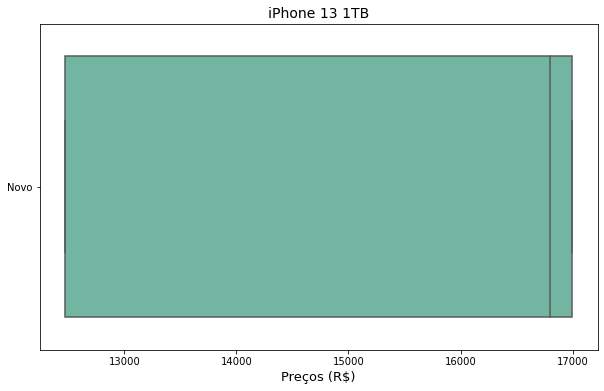

In [168]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphone_13_1TB, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 13 1TB', fontsize=14)
plt.show()

#### iPhone 13 512 GB

In [169]:
Iphone_13_512GB = Iphone_13[ Iphone_13['Aparelhos'].str.contains("512gb", case=False) | 
                            Iphone_13['Aparelhos'].str.contains("512 gb", case=False) ]

Iphone_13_512GB['Precos R$'].astype(float)
Iphone_13_512GB.head()

,Aparelhos,Precos R$,Estado,Links
118,Ouro 24k Apple iPhone 13 Pro 512 Gb Banhado A ...,27900,Novo,https://produto.mercadolivre.com.br/MLB-219022...
126,Ouro 24k Apple iPhone 13 Pro 512 Gb Banhado A ...,27900,Novo,https://produto.mercadolivre.com.br/MLB-219023...
180,Apple iPhone 13 Mini (512 Gb) Rosa,6740,Novo,https://produto.mercadolivre.com.br/MLB-202313...
255,Apple iPhone 13 (512 Gb) Rosa,7252,Novo,https://produto.mercadolivre.com.br/MLB-202318...
269,iPhone 13 512gb Meia-noite Apple,8499,Novo,https://produto.mercadolivre.com.br/MLB-222051...


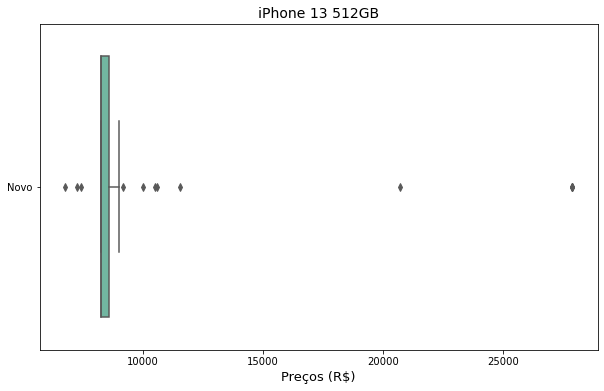

In [170]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphone_13_512GB, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 13 512GB', fontsize=14)
plt.show()

#### iPhone 13 256 GB

In [210]:
Iphone_13_256GB = Iphone_13[ Iphone_13['Aparelhos'].str.contains("256gb", case=False) | 
                            Iphone_13['Aparelhos'].str.contains("256 gb", case=False) ]

Iphone_13_256GB['Precos R$'].astype(float)
Iphone_13_256GB.head()

,Aparelhos,Precos R$,Estado,Links
17,Apple iPhone 13 Pro (256 GB) - Azul-Sierra,7929,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
22,Apple iPhone 13 Pro Max (256 GB) - Azul-Sierra,8531,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
28,Apple iPhone 13 (256 GB) - Meia-noite,6479,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
99,iPhone 13 256gb Estelar Apple,6799,Novo,https://produto.mercadolivre.com.br/MLB-222050...
110,Apple iPhone 13 (256 Gb) - Rosa Novo Lacrado N...,6499,Novo,https://produto.mercadolivre.com.br/MLB-260197...


<Figure size 720x360 with 0 Axes>

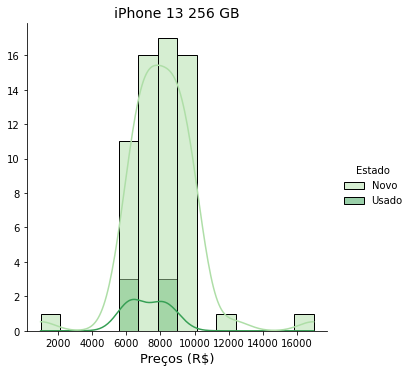

In [241]:
plt.figure(figsize = (10,5))
sns.displot(data=Iphone_13_256GB, x='Precos R$', hue='Estado', palette='Greens', kde=True)
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 13 256 GB', fontsize=14)
plt.show()

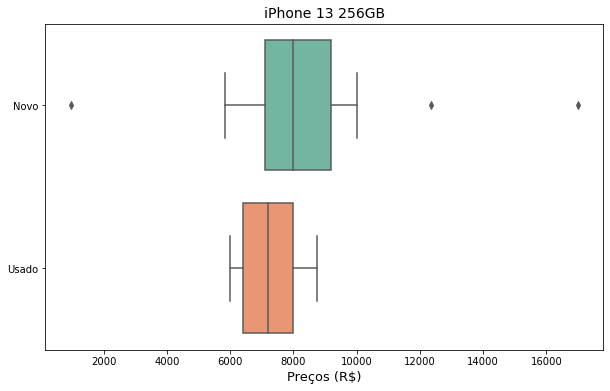

In [172]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphone_13_256GB, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 13 256GB', fontsize=14)
plt.show()

#### iPhone 13 128 GB

In [173]:
Iphone_13_128GB = Iphone_13[ Iphone_13['Aparelhos'].str.contains("128gb", case=False) | 
                            Iphone_13['Aparelhos'].str.contains("128 gb", case=False) ]

Iphone_13_128GB['Precos R$'].astype(float)
Iphone_13_128GB.head()

,Aparelhos,Precos R$,Estado,Links
6,Apple iPhone 13 (128 GB) - Meia-noite,5400,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
24,Apple iPhone 13 Pro Max (128 GB) - Azul-Sierra,8215,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
47,Apple iPhone 13 Pro Max 128gb Verde Alpino,8200,Novo,https://produto.mercadolivre.com.br/MLB-273828...
59,iPhone 13 128gb Estelar Apple,6199,Novo,https://produto.mercadolivre.com.br/MLB-222054...
78,iPhone 13 128gb Azul Apple,6299,Novo,https://produto.mercadolivre.com.br/MLB-222049...


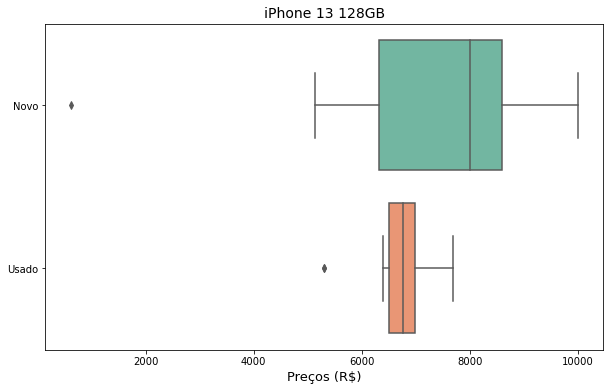

In [174]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphone_13_128GB, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 13 128GB', fontsize=14)
plt.show()

#### iPhone 13 64 GB

In [22]:
#não apareceu esse modelo na busca

Iphone_13_64GB = Iphone_13[ Iphone_13['Aparelhos'].str.contains("64gb", case=False) | 
                            Iphone_13['Aparelhos'].str.contains("64 gb", case=False) ]

Iphone_13_64GB

,Aparelhos,Precos R$,Estado,Links


## iPhone 12

In [23]:
Iphone_12 = Iphones[ Iphones['Aparelhos'].str.contains(" 12 ", case=False) ]
Iphone_12

,Aparelhos,Precos R$,Estado,Links
0,Apple iPhone 12 (64 GB) - Verde,4199,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
10,Apple iPhone 12 (128 GB) - Preto,4859,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
32,Apple iPhone 5s 16gb Tela 4' Ios 12 Redes Soci...,559,Novo,https://produto.mercadolivre.com.br/MLB-169697...
53,iPhone 12 64gb Preto Apple,4598,Novo,https://produto.mercadolivre.com.br/MLB-195239...
56,Apple iPhone 5s 16gb Tela 4' Ios 12 Redes Soci...,559,Novo,https://produto.mercadolivre.com.br/MLB-169697...
...,...,...,...,...
1898,"iPhone 13 Mini Apple 128gb Verde 5,4 , 5g Câme...",5183,Novo,https://produto.mercadolivre.com.br/MLB-271550...
1914,Apple iPhone 12 Pro Max 128gb Anatel - Mancha ...,5499,Usado,https://produto.mercadolivre.com.br/MLB-262447...
1924,"iPhone 12 Preto, Com Tela De 6,1 , 5g, 128gb -...",4814,Novo,https://produto.mercadolivre.com.br/MLB-196887...
1957,Apple iPhone 12 (64 Gb) - Preto,4590,Usado,https://produto.mercadolivre.com.br/MLB-217551...


#### iPhone 12 512 GB

In [175]:
Iphone_12_512GB = Iphone_12[ Iphone_12['Aparelhos'].str.contains("512gb", case=False) | 
                          Iphone_12['Aparelhos'].str.contains("512 gb", case=False) ]

Iphone_12_512GB['Precos R$'].astype(float)
Iphone_12_512GB.head()

,Aparelhos,Precos R$,Estado,Links
69,Apple iPhone 12 Pro Max (512 GB) - Azul-pacífico,8381,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
632,Apple iPhone 12 Pro (512 Gb) Grafite,8299,Novo,https://produto.mercadolivre.com.br/MLB-189686...
1038,Apple iPhone 12 Pro (512 Gb) - Azul-pacífico,7676,Novo,https://produto.mercadolivre.com.br/MLB-217346...


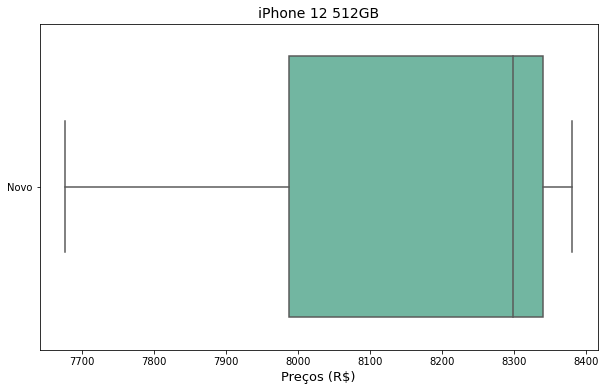

In [176]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphone_12_512GB, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 12 512GB', fontsize=14)
plt.show()

#### iPhone 12 256 GB

In [177]:
Iphone_12_256GB = Iphone_12[ Iphone_12['Aparelhos'].str.contains("256gb", case=False) | 
                          Iphone_12['Aparelhos'].str.contains("256 gb", case=False) ]

Iphone_12_256GB['Precos R$'].astype(float)
Iphone_12_256GB.head()

,Aparelhos,Precos R$,Estado,Links
65,Apple iPhone 12 Pro Max (256 GB) - Dourado,6900,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
103,iPhone 12 Pro 256 Gb Grafite - 12x - Frete Grátis,5839,Novo,https://produto.mercadolivre.com.br/MLB-273116...
113,Apple iPhone 12 Pro Max (256 Gb) - Azul-pacífico,6999,Novo,https://produto.mercadolivre.com.br/MLB-205463...
181,iPhone 12 256gb Azul Apple,6199,Novo,https://produto.mercadolivre.com.br/MLB-195240...
209,iPhone 12 256gb Roxo Apple,5946,Novo,https://produto.mercadolivre.com.br/MLB-195240...


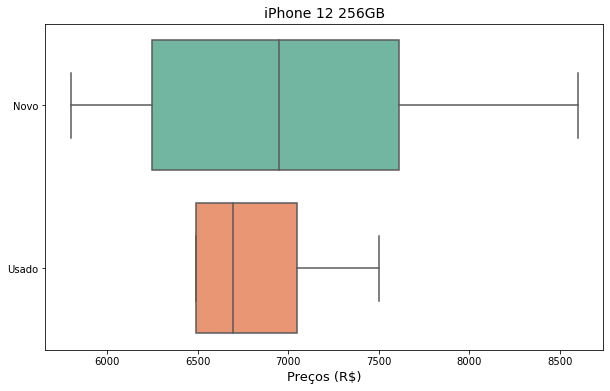

In [178]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphone_12_256GB, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 12 256GB', fontsize=14)
plt.show()

#### iPhone 12 128 GB

In [179]:
Iphone_12_128GB = Iphone_12[ Iphone_12['Aparelhos'].str.contains("128gb", case=False) | 
                          Iphone_12['Aparelhos'].str.contains("128 gb", case=False) ]

Iphone_12_128GB['Precos R$'].astype(float)
Iphone_12_128GB.head()

,Aparelhos,Precos R$,Estado,Links
10,Apple iPhone 12 (128 GB) - Preto,4859,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
84,iPhone 12 128gb Preto Apple,5103,Novo,https://produto.mercadolivre.com.br/MLB-195239...
100,Apple iPhone 12 Pro Max (128 GB) - Prateado,6500,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
141,"iPhone Apple 12 128gb 5g 6,1 Pol Câmera Dupla ...",5394,Novo,https://produto.mercadolivre.com.br/MLB-267478...
160,Apple iPhone 12 Pro (128 Gb) Dourado,7499,Novo,https://produto.mercadolivre.com.br/MLB-189686...


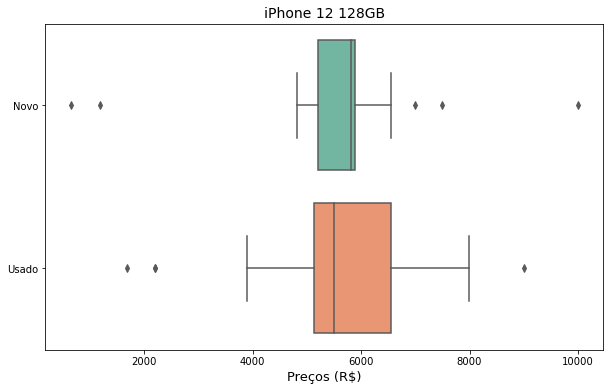

In [180]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphone_12_128GB, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 12 128GB', fontsize=14)
plt.show()

#### iPhone 12 64 GB

In [181]:
Iphone_12_64GB = Iphone_12[ Iphone_12['Aparelhos'].str.contains("64gb", case=False) | 
                          Iphone_12['Aparelhos'].str.contains("64 gb", case=False) ]

Iphone_12_64GB['Precos R$'].astype(float)
Iphone_12_64GB.head()

,Aparelhos,Precos R$,Estado,Links
0,Apple iPhone 12 (64 GB) - Verde,4199,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
53,iPhone 12 64gb Preto Apple,4598,Novo,https://produto.mercadolivre.com.br/MLB-195239...
67,Apple iPhone 12 Mini (64 Gb) Preto,4999,Novo,https://produto.mercadolivre.com.br/MLB-189217...
73,iPhone 12 64gb Azul Apple,4540,Novo,https://produto.mercadolivre.com.br/MLB-195240...
94,Apple iPhone 12 (64 Gb) Roxo,4417,Novo,https://produto.mercadolivre.com.br/MLB-189211...


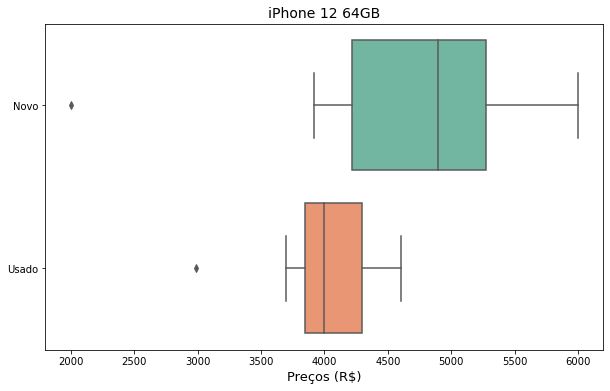

In [182]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphone_12_64GB, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 12 64GB', fontsize=14)
plt.show()

## iPhone 11

In [30]:
Iphone_11 = Iphones[ Iphones['Aparelhos'].str.contains(" 11 ", case=False) ]
Iphone_11

,Aparelhos,Precos R$,Estado,Links
3,Apple iPhone 11 (128 GB) - Preto,3699,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
4,Apple iPhone 11 (64 GB) - Preto,3199,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
14,Apple iPhone 11 (256 GB) - Roxo,5199,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
31,iPhone 11 64gb Preto Apple,3371,Novo,https://produto.mercadolivre.com.br/MLB-199102...
50,iPhone 11 64gb Preto Apple,3371,Novo,https://produto.mercadolivre.com.br/MLB-199102...
...,...,...,...,...
1977,iPhone 11 128gb Preto Muito Bom - Trocafone - ...,3369,Usado,https://produto.mercadolivre.com.br/MLB-267199...
1988,iPhone 11 64 Gb Branco Cinza Seminovo,2800,Usado,https://produto.mercadolivre.com.br/MLB-272494...
1991,iPhone 11 64 Roxo85% (327),2700,Usado,https://produto.mercadolivre.com.br/MLB-267666...
1992,iPhone 11 128gb Preto Bom - Trocafone - Celula...,3099,Usado,https://produto.mercadolivre.com.br/MLB-271540...


#### iPhone 11 512 GB

In [124]:
Iphone_11_512GB = Iphone_11[ Iphone_11['Aparelhos'].str.contains("512gb", case=False) | 
                          Iphone_11['Aparelhos'].str.contains("512 gb", case=False) ]
Iphone_11_512GB['Precos R$'].astype(float)
Iphone_11_512GB

,Aparelhos,Precos R$,Estado,Links
1522,iPhone 11 Pro Max 512 Gb Verde-meia-noite,5491,Usado,https://produto.mercadolivre.com.br/MLB-273686...
1962,iPhone 11 Pro Max 512gb Verde Meia-noite Excel...,5679,Usado,https://produto.mercadolivre.com.br/MLB-189405...


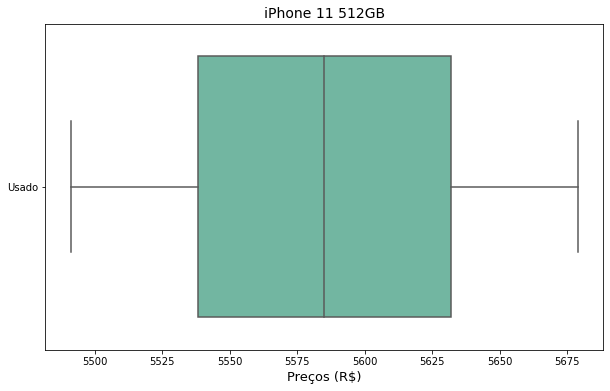

In [167]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphone_11_512GB, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 11 512GB', fontsize=14)
plt.show()

#### iPhone 11 256 GB

In [154]:
Iphone_11_256GB = Iphone_11[ Iphone_11['Aparelhos'].str.contains("256gb", case=False) | 
                          Iphone_11['Aparelhos'].str.contains("256 gb", case=False) ]

Iphone_11_256GB['Precos R$'].astype(float)
Iphone_11_256GB.head()

,Aparelhos,Precos R$,Estado,Links
14,Apple iPhone 11 (256 GB) - Roxo,5199,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
63,iPhone 11 Pro Max 256 GB cinza-espacial,5500,Novo,https://www.mercadolivre.com.br/iphone-11-pro-...
169,iPhone 11 256gb Amarelo Apple,5499,Novo,https://produto.mercadolivre.com.br/MLB-199103...
183,Apple iPhone 11 256 Gb Branco,5199,Novo,https://produto.mercadolivre.com.br/MLB-199103...
296,Apple iPhone 11 256 Gb Roxo,5199,Novo,https://produto.mercadolivre.com.br/MLB-189211...


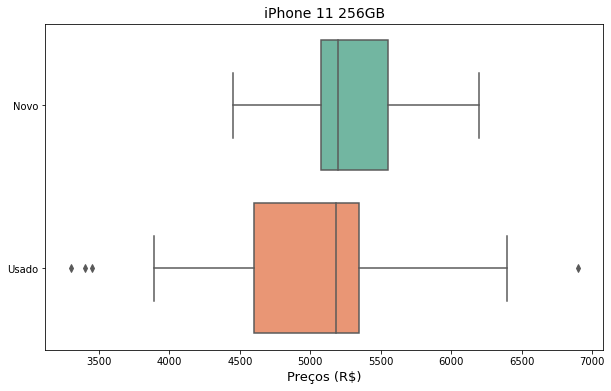

In [164]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphone_11_256GB, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 11 256GB', fontsize=14)
plt.show()

#### iPhone 11 128 GB

In [156]:
Iphone_11_128GB = Iphone_11[ Iphone_11['Aparelhos'].str.contains("128gb", case=False) | 
                          Iphone_11['Aparelhos'].str.contains("128 gb", case=False) ]

Iphone_11_128GB['Precos R$'].astype(float)
Iphone_11_128GB.head()

,Aparelhos,Precos R$,Estado,Links
3,Apple iPhone 11 (128 GB) - Preto,3699,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
71,Apple iPhone 11 (128 Gb) - Preto,4499,Novo,https://produto.mercadolivre.com.br/MLB-199102...
82,Apple iPhone 11 (128 Gb) - Branco,4499,Novo,https://produto.mercadolivre.com.br/MLB-199103...
119,Apple iPhone 11 (128 Gb) - Branco,4500,Novo,https://produto.mercadolivre.com.br/MLB-261695...
136,Apple iPhone 11 (128 Gb) - Preto,3999,Novo,https://produto.mercadolivre.com.br/MLB-268968...


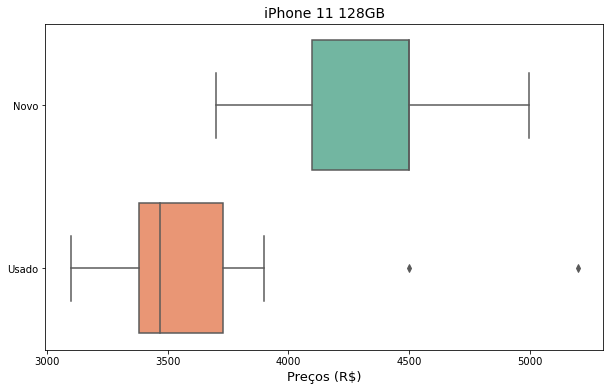

In [166]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphone_11_128GB, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 11 128GB', fontsize=14)
plt.show()

#### iPhone 11 64 GB

In [158]:
Iphone_11_64GB = Iphone_11[ Iphone_11['Aparelhos'].str.contains("64gb", case=False) | 
                          Iphone_11['Aparelhos'].str.contains("64 gb", case=False) ]

Iphone_11_64GB['Precos R$'].astype(float)
Iphone_11_64GB.head()

,Aparelhos,Precos R$,Estado,Links
4,Apple iPhone 11 (64 GB) - Preto,3199,Novo,https://www.mercadolivre.com.br/apple-iphone-1...
31,iPhone 11 64gb Preto Apple,3371,Novo,https://produto.mercadolivre.com.br/MLB-199102...
50,iPhone 11 64gb Preto Apple,3371,Novo,https://produto.mercadolivre.com.br/MLB-199102...
66,iPhone 11 Pro Max 64 GB dourado,5000,Novo,https://www.mercadolivre.com.br/iphone-11-pro-...
92,iPhone 11 64gb Branco Apple,3999,Novo,https://produto.mercadolivre.com.br/MLB-189211...


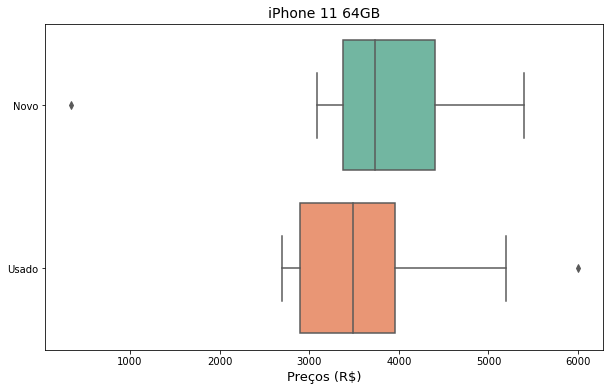

In [165]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Precos R$', y='Estado', data=Iphone_11_64GB, palette="Set2")
plt.xlabel('Preços (R$)', fontsize=13);
plt.ylabel('', fontsize=16);
plt.title('iPhone 11 64GB', fontsize=14)
plt.show()

In [80]:
#data.loc[data['URL'].str.contains("youtub"),'test'] = 'Youtube'
#Iphone_11.loc[ Iphone_11['Aparelhos'].str.contains("64 gb", case=False), 'Modelo'   ] = '64 GB'
#Iphone_11.loc[ Iphone_11['Aparelhos'].str.contains("128 gb", case=False), 'Modelo'   ] = '128 GB'
#Iphone_11.loc[ Iphone_11['Aparelhos'].str.contains("256 gb", case=False), 'Modelo'   ] = '256 GB'
#Iphone_11.loc[ Iphone_11['Aparelhos'].str.contains("512 gb", case=False), 'Modelo'   ] = '512 GB'